# This notebook contains the final figures for the SILVR paper
# Previous plots was box plot. This updated version now uses violins.

In [1]:
import pandas as pd

# SILVR + EDM, fragments 0072 + 0107
experiment_names = ['exp_9','exp_10','exp_11','exp_12','exp_13','exp_14','exp_15']

# BRIDGE + EDM, fragments 0072 + 0107
# experiment_names = ['exp_16','exp_17','exp_18','exp_19','exp_20','exp_21','exp_22']

# BRIDGE + EDM, fragments 0072 + 0107 (250 SAMPLES)
# experiment_names = ['exp_23','exp_24','exp_25','exp_26','exp_27','exp_28','exp_29']
# BRIDGE + EDM, fragments 0072 + 0107 (Explicit Hydrogens)
# experiment_names = ['exp_30','exp_31','exp_32','exp_33','exp_34','exp_35','exp_36']
df = pd.read_csv(f"experiments/{experiment_names[0]}_to_{experiment_names[-1]}_data_all.csv")
len(df)

728

In [2]:
print(len(df[df["auto3d_rmsd"].notna()]))
print(len(df[df["is_fragmented"]==False]))
print(len(df[df["auto3d_rmsd"].notna()])/len(df[df["is_fragmented"]==False]))

513
534
0.9606741573033708


In [3]:
from matplotlib import pyplot as plt

def get_data_to_plot(df, exps, metric):
    make_100x = True
    ignore_nan = True
    plotting_data = []
    
    #labels = []
    
    for exp in exps:
        if ignore_nan:
            metric_value = df[(df["exp_id"] == exp) & df[metric].notna()][metric]
        else:
            metric_value = df[df["exp_id"] == exp][metric]
        plotting_data.append(metric_value)
        
        #labels.append(str(df[df["exp_id"] == exp]["silvr"].iloc[0]*100))
    

    return plotting_data


def get_plot_labels(df, exps, make_100x=True):
    labels = []
    for exp in exps:
        labels.append(str(df[df["exp_id"] == exp]["silvr"].iloc[0]*100))
    return labels

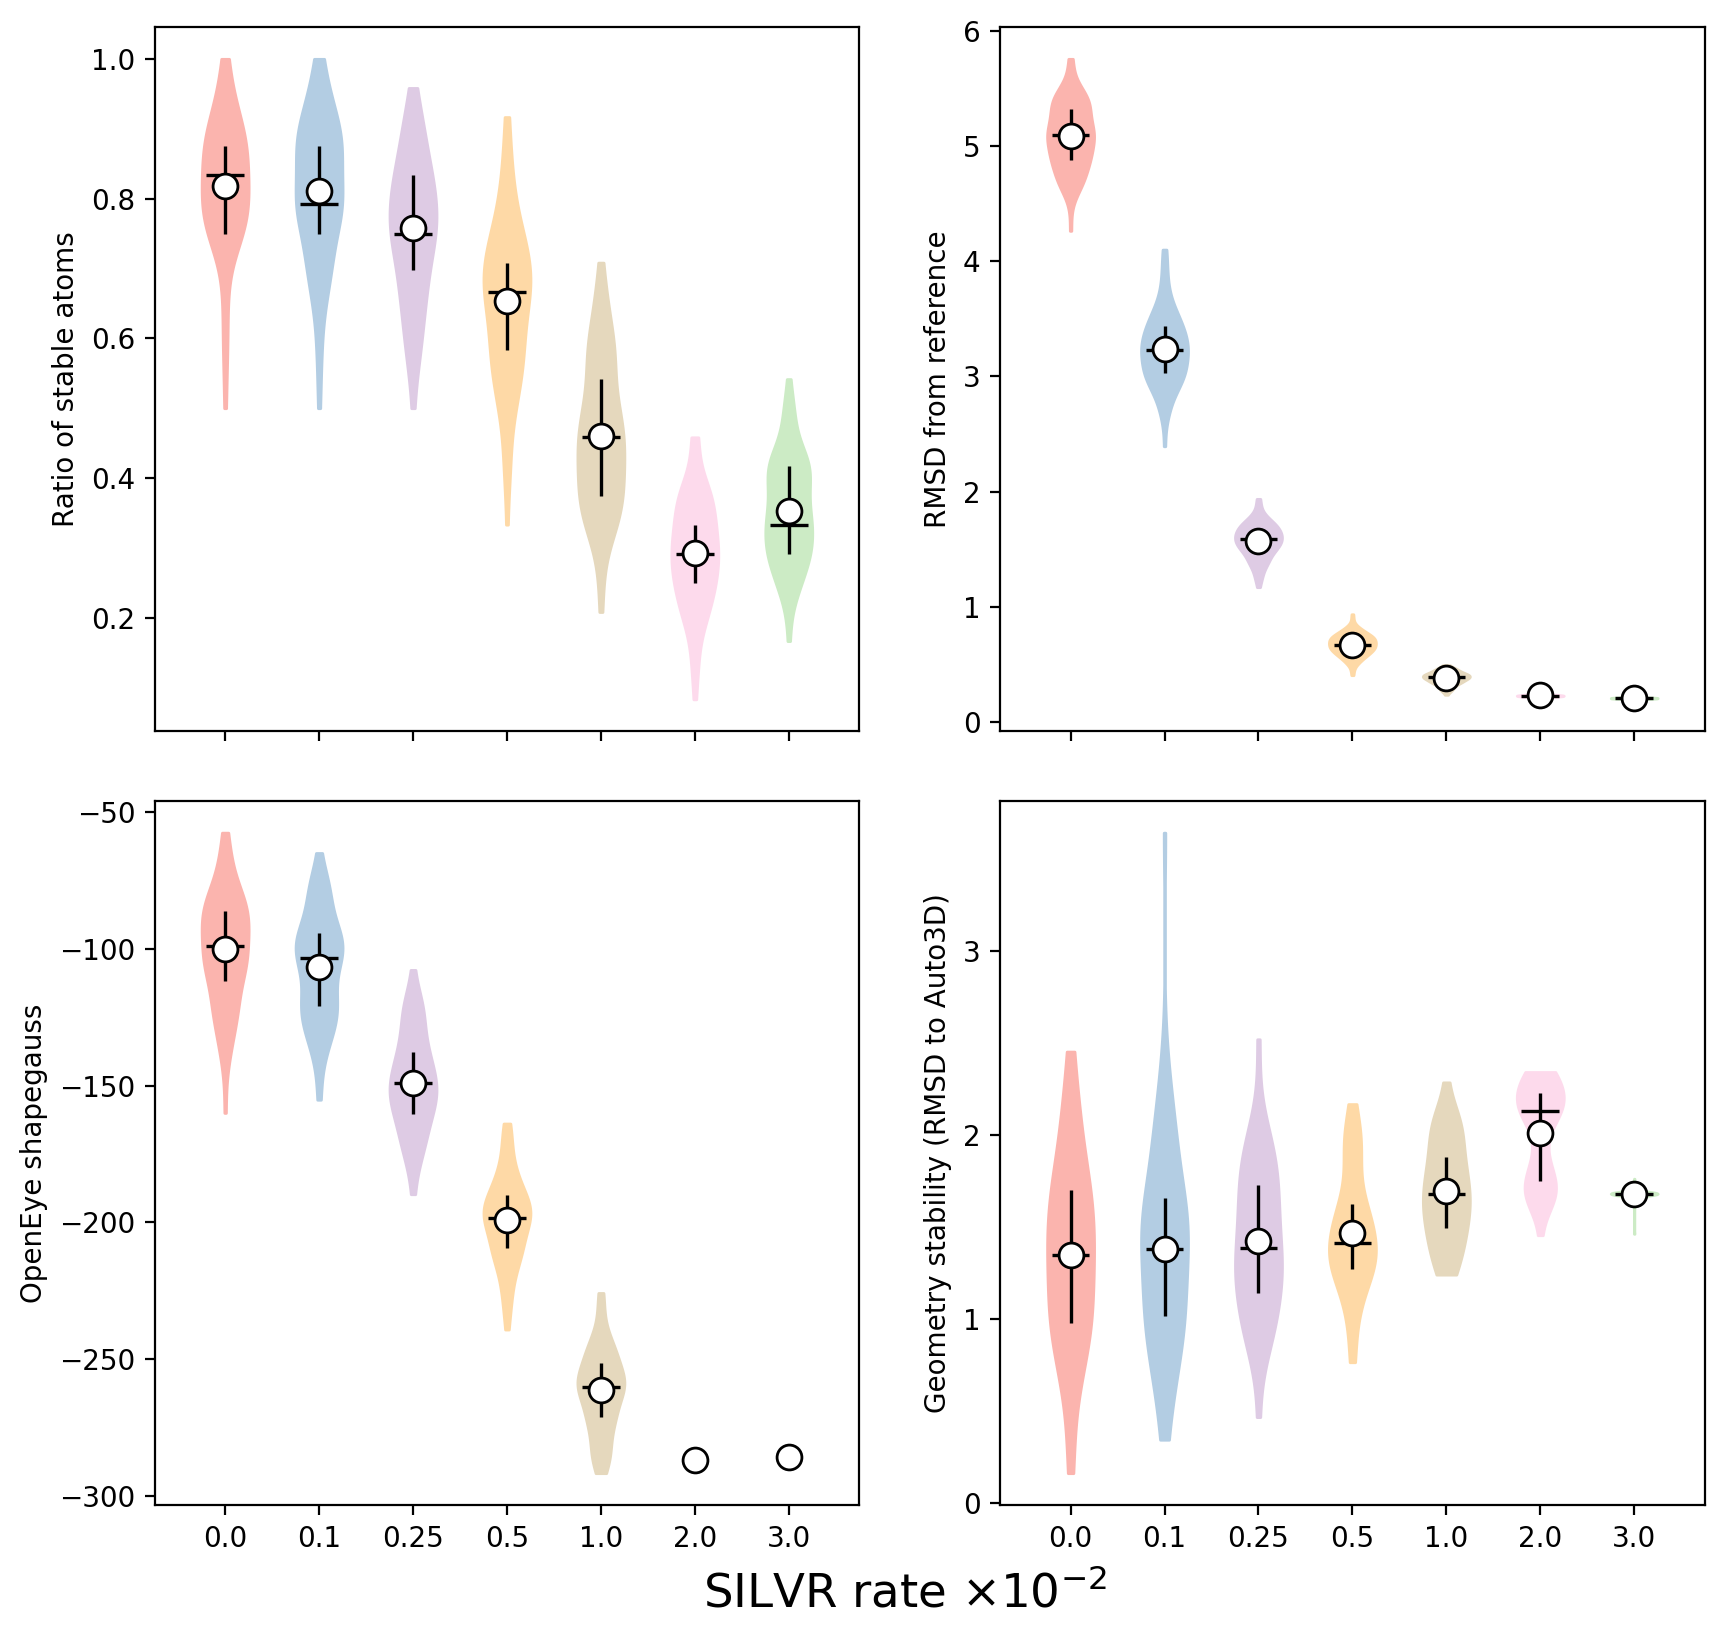

In [4]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np


"""
Very messy code
I should be studying for exams so don't have time right now to make this cleaner
"""

#-----Data to plot---------
#These experiments need to be redone without the dummy atoms
ordered_exp_names = experiment_names #list(exp_df.sort_values("silvr")["exp_id"])
#selected_df = df[df["is_fragmented"]==False]

#selected_df = df


#Make horizontal line black for readability!!!!!!!!


#-----Plot setup--------
#fig = plt.figure(figsize=(5, 5), dpi=80)
#ax = fig.add_subplot()

#plt.subplots(figsize=(6, 2))
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200,
                        #constrained_layout=True,
                        subplot_kw=dict(box_aspect=1),sharex=True)
#fig.tight_layout(pad=1)
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')

plt.rcParams['font.size'] = '14'
xlabel = r"SILVR rate $\times 10^{-2}$"

lw=1.2

#-----plotting---------------


#since all plots share the same label
labels = get_plot_labels(df, ordered_exp_names)


#------------------[0,0] atom stability------------------
plotting_data = get_data_to_plot(df, ordered_exp_names, "stable_ratio")
box00 = axs[0,0].violinplot(plotting_data, showmeans=False, showmedians=True,showextrema=False)
axs[0,0].set(ylabel='Ratio of stable atoms')
#axs[0,0].set_title('A',loc='left')

#Add means as circles
means00 = [np.mean(x) for x in plotting_data]
inds00 = np.arange(1, len(means00) + 1)
axs[0,0].scatter(inds00, means00, marker='o', facecolors='white', edgecolors='black',s=80,zorder=10)

#Add quartiles
quartile1, medians, quartile3 = np.percentile(plotting_data, [25, 50, 75], axis=1)
axs[0,0].vlines(inds00, quartile1, quartile3, color='k', linestyle='-', lw=lw)



#------------------[0,1] RMSD from reference------------------
plotting_data = get_data_to_plot(df, ordered_exp_names, "crude_rmsd")
box01 = axs[0,1].violinplot(plotting_data, showmeans=False, showmedians=True,showextrema=False)
axs[0,1].set(ylabel='RMSD from reference')
#axs[0,1].set_title('B',loc='left')

#Add means as circles
means01 = [np.mean(x) for x in plotting_data]
inds01 = np.arange(1, len(means01) + 1)
axs[0,1].scatter(inds01, means01, marker='o', facecolors='white', edgecolors='black',s=80,zorder=10)

#Add quartiles
quartile1, medians, quartile3 = np.percentile(plotting_data, [25, 50, 75], axis=1)
axs[0,1].vlines(inds01, quartile1, quartile3, color='k', linestyle='-', lw=lw)

#------------------[1,0] shapegauss------------------
plotting_data = get_data_to_plot(df[df["shapegauss"]<200], ordered_exp_names, "shapegauss")

#Note: for SILVR=0.02 and 0.03 only 8 and 1 shapegauss value actually passes
#These are removed from the analysis as points are not representative
#plotting_data[-1] = [-50]
#plotting_data[-2] = [-50]
box10 = axs[1,0].violinplot(plotting_data[:-2], showmeans=False, showmedians=True,showextrema=False)
axs[1,0].set(ylabel='OpenEye shapegauss',
             #xlabel=xlabel
            )
#axs[1,0].set_title('C',loc='left')


#Add means as circles
means10 = [np.mean(x) for x in plotting_data]
inds10 = np.arange(1, len(means10) + 1)
axs[1,0].scatter(inds10, means10, marker='o', facecolors='white', edgecolors='black',s=80,zorder=10)

#Add quartiles
out = [np.percentile(p, [25, 50, 75], axis=0) for p in plotting_data[:-2]]
quartile1 = [o[0] for o in out]
medians = [o[1] for o in out]
quartile3 = [o[2] for o in out]
axs[1,0].vlines(inds10[:-2], quartile1, quartile3, color='k', linestyle='-', lw=lw)





#------------------[1,1] Geometric stability------------------
#!!!! Using rmsd column
plotting_data = get_data_to_plot(df[(df["is_fragmented"]==False) & (df["auto3d_rmsd"].notna())], ordered_exp_names, "auto3d_rmsd")
box11 = axs[1,1].violinplot(plotting_data, showmeans=False, showmedians=True,showextrema=False)
axs[1,1].set(ylabel='Geometry stability (RMSD to Auto3D)',
             #xlabel=xlabel
             yticks = [0, 1, 2,3,4],#Forcing the axis labels to be integers
            )
#axs[1,1].set_title('D',loc='left')


#Add means as circles
means11 = [np.mean(x) for x in plotting_data]
inds11 = np.arange(1, len(means11) + 1)
axs[1,1].scatter(inds11, means11, marker='o', facecolors='white', edgecolors='black',s=80,zorder=10)

#Add quartiles
out = [np.percentile(p, [25, 50, 75], axis=0) for p in plotting_data]
quartile1 = [o[0] for o in out]
medians = [o[1] for o in out]
quartile3 = [o[2] for o in out]
axs[1,1].vlines(inds11, quartile1, quartile3, color='k', linestyle='-', lw=lw)

#------------------Make plot look nice------------------

#fig.text(0.5, 0, xlabel, ha='center')
plt.subplots_adjust(wspace=0.2, hspace=0.01)
fig.supxlabel(xlabel,y=0.07)

#----colors----
n_boxes = len(ordered_exp_names)
colors = cm.Pastel1(np.linspace(0, 1, n_boxes))

#substitute_last_colour = cm.Pastel2(np.linspace(0, 1, 9))[8]#2,5
substitute_last_colour = cm.Pastel1(np.linspace(0, 1, 9))[2]#2,5
colors[-1] = substitute_last_colour



def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
set_axis_style(axs[0,0], labels)

    #set mean to white circle
    
#plots['cmedians'].set_colors(colors)

boxes = [box00,box01,box10,box11]
for box in boxes:
       
    
    for patch, color in zip(box['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)
        patch.set_alpha(1)

    all_lines = ["cmedians"]#,"cbars", "cmins","cmaxes"
    for l in all_lines:
        box[l].set_linewidth(lw)
        box[l].set_color("black")
        
        
        factor_x, factor_y = 1.6, 1
        
        if l == "cmedians":
            vp = box[l]
            
            lines = vp.get_segments()
            new_lines = []
            for line in lines:
                center = line.mean(axis=0)
                line = (line - center) * np.array([factor_x, factor_y]) + center
                new_lines.append(line)
            vp.set_segments(new_lines)
            
        
        
plt.savefig(f'figures/figures/{experiment_names[0]}_to_{experiment_names[-1]}_Stability_Metrics_violins.png')

In [5]:
df["qed"].notna().groupby(df["silvr"]).value_counts(True)[::2].mean()

0.8901098901098902

<Axes: title={'center': 'Percentage of successful OB/RDKit reads'}, xlabel='SILVR rate', ylabel='Percentage of molecules\nread by RDKit'>

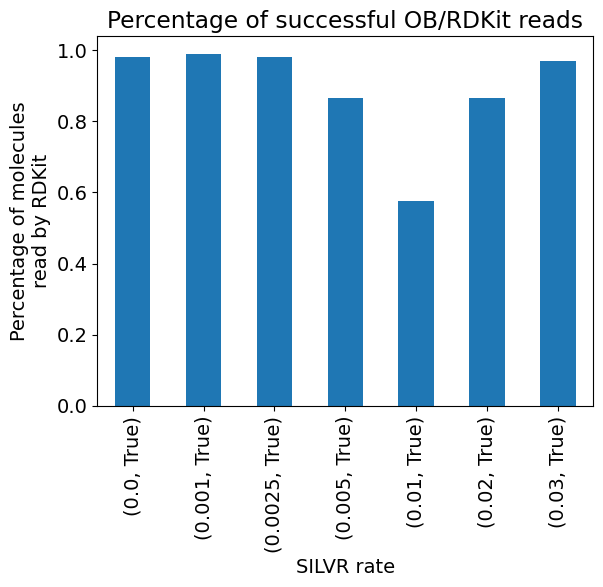

In [6]:
df["qed"].notna().groupby(df["silvr"]).value_counts(True)[::2].plot(kind="bar", title="Percentage of successful OB/RDKit reads",xlabel="SILVR rate", ylabel="Percentage of molecules\nread by RDKit")

##### Synthetic accessibility and QED

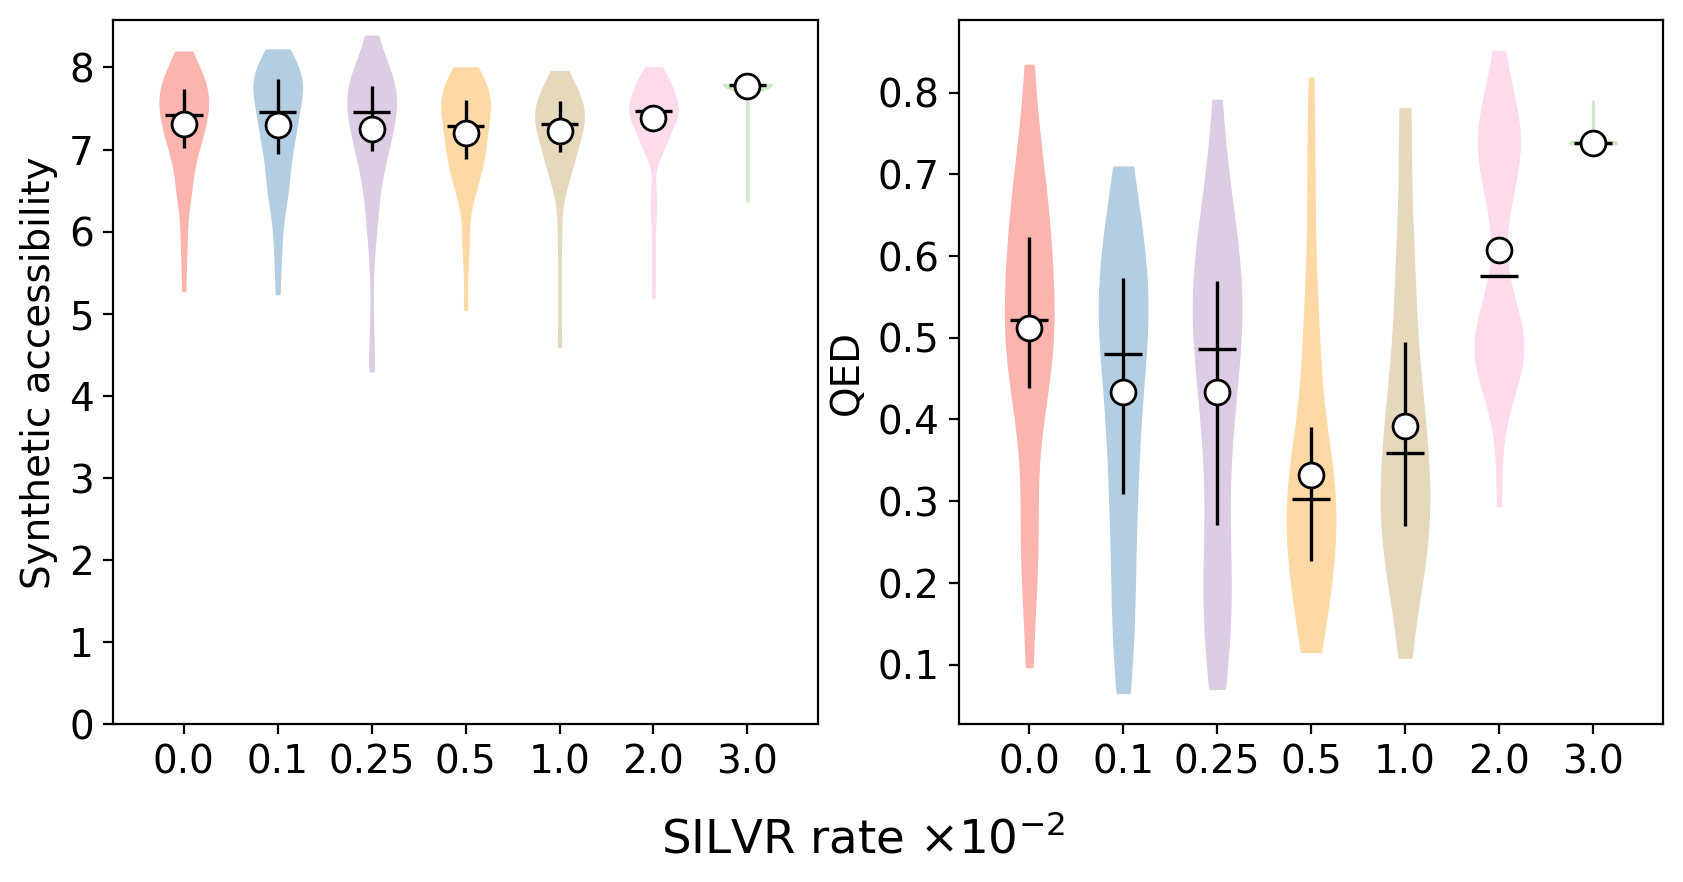

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10), dpi=200,
                        #constrained_layout=True,
                        subplot_kw=dict(box_aspect=1),sharex=True,
                       facecolor='white')
#fig.tight_layout(pad=1)
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')

plt.rcParams['font.size'] = '14'
xlabel = r"SILVR rate $\times 10^{-2}$"

#-----plotting---------------


#since all plots share the same label
#labels = get_plot_labels(df, ordered_exp_names)

non_fragmented_df = df[df["is_fragmented"]==False]
#non_fragmented_df = df

#------------------[0,0] synthetic accessibility------------------
plotting_data = get_data_to_plot(non_fragmented_df, ordered_exp_names, "sa")
box00 = axs[0].violinplot(plotting_data, showmeans=False, showmedians=True,showextrema=False)
axs[0].set(ylabel='Synthetic accessibility')
axs[0].set_ylim(bottom=0)

#axs[0,0].set_title('A',loc='left')

#Add means as circles
means0 = [np.mean(x) for x in plotting_data]
inds0 = np.arange(1, len(means0) + 1)
axs[0].scatter(inds0, means0, marker='o', facecolors='white', edgecolors='black',s=80,zorder=10)
#Add quartiles
out = [np.percentile(p, [25, 50, 75], axis=0) for p in plotting_data[:-2]]
quartile1 = [o[0] for o in out]
medians = [o[1] for o in out]
quartile3 = [o[2] for o in out]
axs[0].vlines(inds0[:-2], quartile1, quartile3, color='k', linestyle='-', lw=lw)




#------------------[0,1] QED------------------
plotting_data = get_data_to_plot(non_fragmented_df, ordered_exp_names, "qed")
box01 = axs[1].violinplot(plotting_data, showmeans=False, showmedians=True,showextrema=False)
axs[1].set(ylabel='QED')
#axs[0,1].set_title('B',loc='left')

#Add means as circles
means1 = [np.mean(x) for x in plotting_data]
inds1 = np.arange(1, len(means1) + 1)
axs[1].scatter(inds1, means1, marker='o', facecolors='white', edgecolors='black',s=80,zorder=10)
#Add quartiles
out = [np.percentile(p, [25, 50, 75], axis=0) for p in plotting_data[:-2]]
quartile1 = [o[0] for o in out]
medians = [o[1] for o in out]
quartile3 = [o[2] for o in out]
axs[1].vlines(inds1[:-2], quartile1, quartile3, color='k', linestyle='-', lw=lw)



#------------------Make plot look nice------------------

#fig.text(0.5, 0, xlabel, ha='center')
plt.subplots_adjust(wspace=0.2, hspace=0.01)
fig.supxlabel(xlabel,y=0.25)

#----colors----
n_boxes = len(ordered_exp_names)
colors = cm.Pastel1(np.linspace(0, 1, n_boxes))

#substitute_last_colour = cm.Pastel2(np.linspace(0, 1, 9))[8]#2,5
substitute_last_colour = cm.Pastel1(np.linspace(0, 1, 9))[2]#2,5
colors[-1] = substitute_last_colour



def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
set_axis_style(axs[0], labels)



boxes = [box00, box01]
for box in boxes:
       
    
    for patch, color in zip(box['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)
        patch.set_alpha(1)

    all_lines = ["cmedians"]#,"cbars", "cmins","cmaxes"
    for l in all_lines:
        box[l].set_linewidth(lw)
        box[l].set_color("black")
        
        
        factor_x, factor_y = 1.6, 1
        
        if l == "cmedians":
            vp = box[l]
            
            lines = vp.get_segments()
            new_lines = []
            for line in lines:
                center = line.mean(axis=0)
                line = (line - center) * np.array([factor_x, factor_y]) + center
                new_lines.append(line)
            vp.set_segments(new_lines)
        
        

plt.savefig(f'figures/figures/{experiment_names[0]}_to_{experiment_names[-1]}_SA_QED_violins.png')

# Fraction fragmented

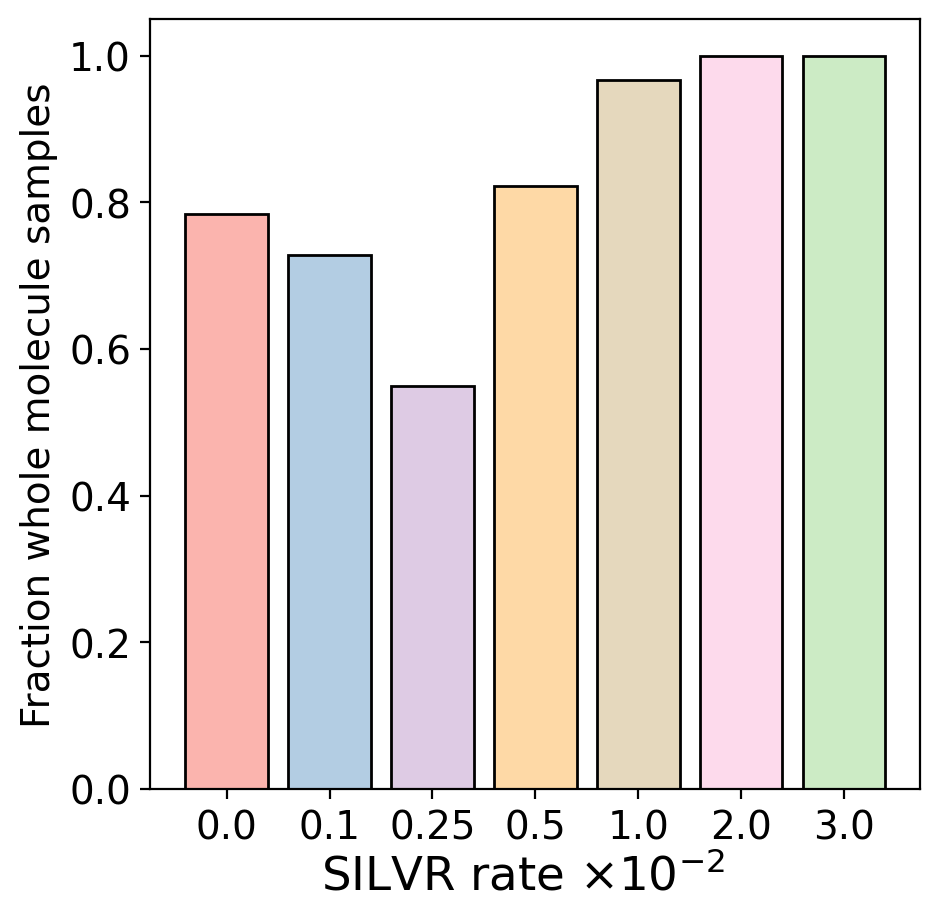

In [8]:
fig, axs = plt.subplots(1, figsize=(5, 5), dpi=200,
                        #constrained_layout=True,
                        subplot_kw=dict(box_aspect=1),sharex=True,
                       facecolor='white')
#fig.tight_layout(pad=1)

meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')

plt.rcParams['font.size'] = '14'
xlabel = r"SILVR rate $\times 10^{-2}$"

#-----plotting---------------

#----colors----
n_boxes = len(ordered_exp_names)
colors = cm.Pastel1(np.linspace(0, 1, n_boxes))
substitute_last_colour = cm.Pastel1(np.linspace(0, 1, 9))[2]#2,5
colors[-1] = substitute_last_colour



#------------------fragmented------------------
plotting_data = get_data_to_plot(df, ordered_exp_names, "is_fragmented")

ratio_whole_array = []
for exp in ordered_exp_names:
    out = df[(df["exp_id"]==exp) & df["is_fragmented"].notna()]
    try:
        ratio_whole = out["is_fragmented"].value_counts("True").loc[False] 
        ratio_whole_array.append(ratio_whole)
    except:
        ratio_whole_array.append(0)
    
    
box00 = axs.bar(labels, ratio_whole_array, color=colors, edgecolor='black')
axs.set(ylabel='Fraction whole molecule samples')
axs.set_ylim(bottom=0)

#axs[0,0].set_title('A',loc='left')



#------------------Make plot look nice------------------

#fig.text(0.5, 0, xlabel, ha='center')
plt.subplots_adjust(wspace=0.2, hspace=0.01)
fig.supxlabel(xlabel,y=0.0)
        

plt.savefig(f'figures/figures/{experiment_names[0]}_to_{experiment_names[-1]}_fraction_whole_molecules.png')